In [2]:
import pandas as pd

file_path = './data/raw/insurance.csv'
data = pd.read_csv(file_path)

data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 描述性统计：查看数据的中心趋势和分布。

In [3]:
descriptive_stats = data.describe()

descriptive_stats


,age,bmi,children,charges
count,1244.000000,1244.000000,1244.000000,1244.000000
mean,39.088424,30.582858,1.103698,13198.216342
std,14.055295,6.159513,1.215885,12001.805804
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.060000,0.000000,4733.635288
50%,39.000000,30.210000,1.000000,9382.033000
75%,51.000000,34.618750,2.000000,16579.959053
max,64.000000,53.130000,5.000000,63770.428010


以下是数据集的描述性统计信息：

- 年龄：
    + 平均值：39.09岁
    + 标准差：14.06岁
    + 最小值：18岁
    + 25% 分位数：26岁
    + 中位数：39岁
    + 75% 分位数：51岁
    + 最大值：64岁

- BMI：
    + 平均值：30.58
    + 标准差：6.16
    + 最小值：15.96
    + 25% 分位数：26.06
    + 中位数：30.21
    + 75% 分位数：34.62
    + 最大值：53.13
    
- 子女：
    + 平均值：1.10
    + 标准差：1.22
    + 最小值：0
    + 25% 分位数：0
    + 中位数：1
    + 75% 分位数：2
    + 最大值：5

- 费用：
    + 平均值：13198.22
    + 标准差：12001.81
    + 最小值：1121.87
    + 25% 分位数：4733.64
    + 中位数：9382.03
    + 75% 分位数：16579.96
    + 最大值：63770.43

从描述性统计信息中，可以看到年龄和费用的分布相对均匀，而BMI的分布则稍微偏向较高的值。子女的数量则主要集中在0到2之间。

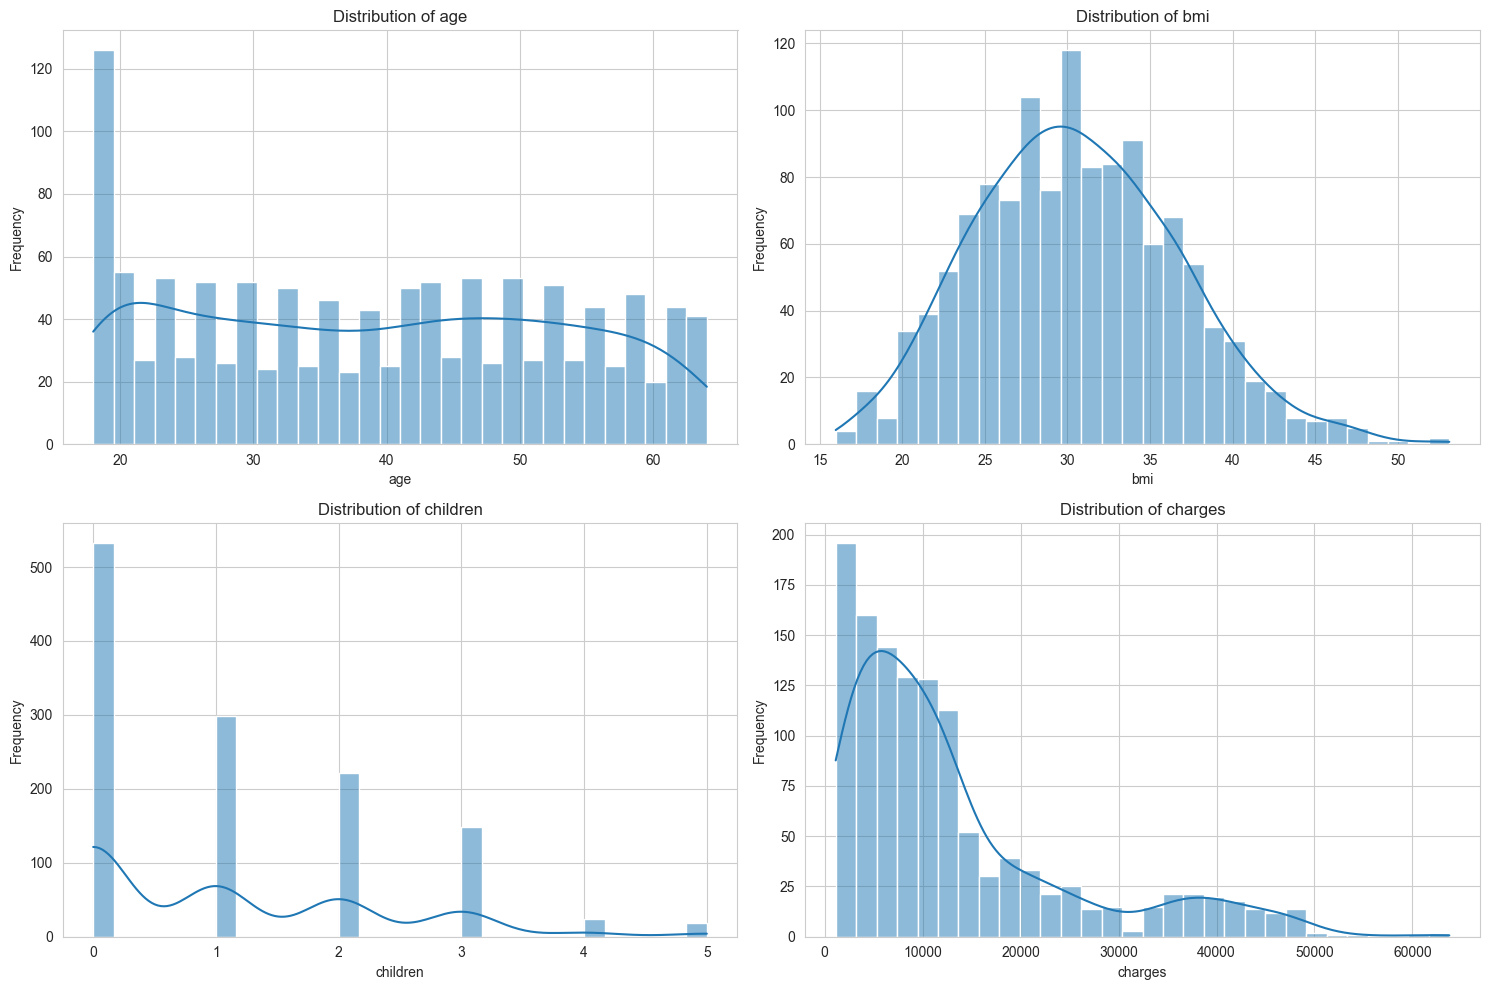

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(15, 10))
for i, column in enumerate(data.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()

plt.show()


从上图中的直方图，可以观察到以下几点：

- 年龄分布：年龄分布呈现出正态分布的形态，大部分人的年龄集中在30至50岁之间。
- BMI分布：BMI的分布稍微右偏，意味着有较多的人拥有较高的BMI值，这可能暗示了健康问题。
- 子女数量分布：子女数量的分布主要集中在0到2之间，表明大多数受益人有较少的子女。
- 费用分布：费用分布呈现出右偏，这意味着存在一些高额的医疗费用，这些可能是异常值或特殊情况

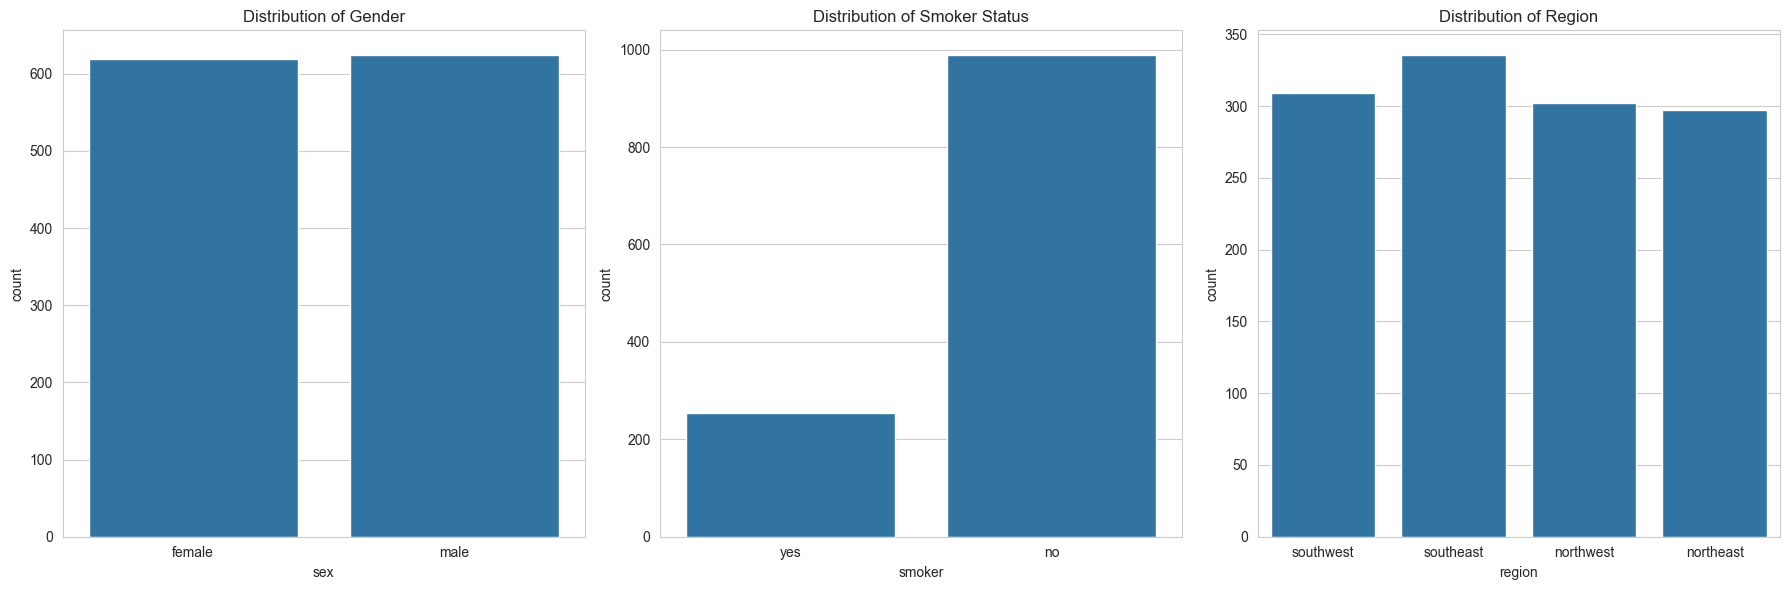

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# 检查缺失值
missing_values = data.isnull().sum()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# sex 散点图
sns.countplot(data=data, x='sex', ax=axes[0])
axes[0].set_title('Distribution of Gender')

# smoker 散点图
sns.countplot(data=data, x='smoker', ax=axes[1])
axes[1].set_title('Distribution of Smoker Status')

# 地区散点图
sns.countplot(data=data, x='region', ax=axes[2])
axes[2].set_title('Distribution of Region')

plt.tight_layout()

plt.show()

missing_values


从上图中的条形图，可以观察到以下几点：

- 性别分布：男性受益人的数量略多于女性。
- 吸烟者分布：非吸烟者的数量明显多于吸烟者。
- 地区分布：东南部和西南部的受益人数量最多，而东北部的受益人数量最少。

同时，数据集中没有缺失值，每一列都是完整的。

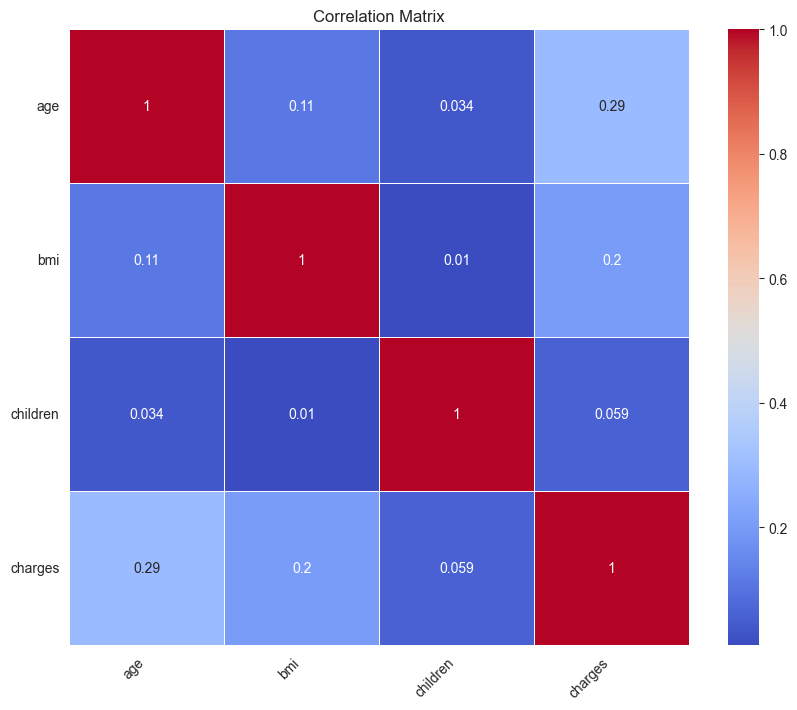

In [6]:
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()


从上面的热力图中，可以观察到以下几点相关性：

- 年龄与费用：年龄和费用之间存在正相关性，这意味着随着年龄的增长，医疗费用也倾向于增加。
- BMI与费用：BMI和费用之间也有正相关性，这表明较高的BMI值可能导致更高的医疗费用。
- 子女数量与费用：子女数量和费用之间也存在正相关性，尽管这种相关性不是很强。

为了使用线性回归模型预测个人医疗费用，需要对分类变量（性别、吸烟者和地区）进行编码，将它们转换为数值类型：

- 性别（sex）：可以使用独热编码（One-Hot Encoding），将“男性”和“女性”转换为两个二进制特征。
- 吸烟者（smoker）：同样可以使用独热编码，将“是”和“否”转换为两个二进制特征。
- 地区（region）：地区有四个不同的值（东北部、东南部、西南部、西北部），使用独热编码将其转换为四个二进制特征。

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 区分数值型数据和类别型数据
numeric_cols = ['age', 'bmi', 'children']
categorical_cols = ['sex', 'smoker', 'region']

# 数值型 transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values by replacing them with the mean
    ('scaler', StandardScaler())  # Standardize the data
])

# 类别型 transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values by replacing them with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-Hot encode the data
])

# 将两种类型数据的 transformer，组合成 preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# 对数据进行特征处理
X = data.drop('charges', axis=1)
y = data['charges']

X_preprocessed = preprocessor.fit_transform(X)
X_preprocessed

array([[-1.42981731, -0.43573844, -0.90809679, ...,  0.        ,
         0.        ,  1.        ],
       [-1.50099348,  0.51764221, -0.08532009, ...,  0.        ,
         1.        ,  0.        ],
       [-0.78923169,  0.39258206,  1.5602333 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.50099348,  1.01788282, -0.90809679, ...,  0.        ,
         1.        ,  0.        ],
       [-1.28746495, -0.77681158, -0.90809679, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.55958224, -0.24571197, -0.90809679, ...,  1.        ,
         0.        ,  0.        ]])

由于 charges 与其他字段数值相差太大，需要特殊处理，检查charges的分布，并考虑是否进行对数变换

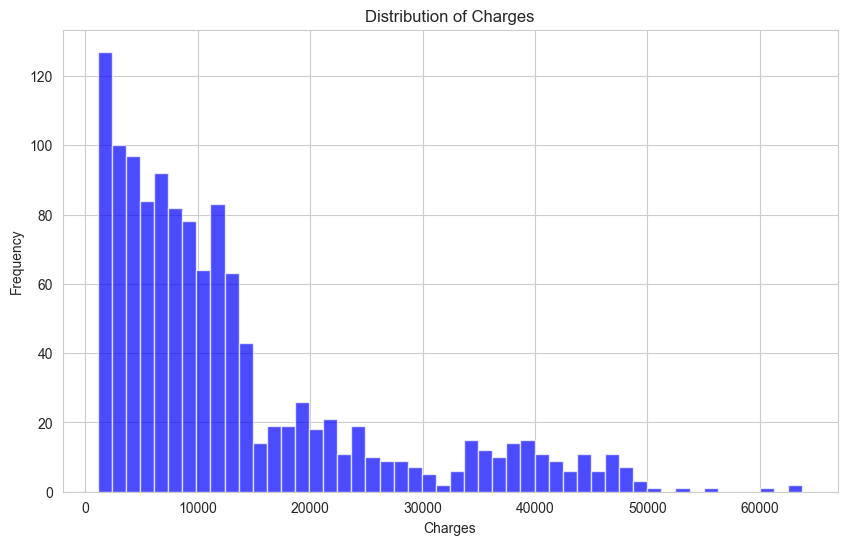

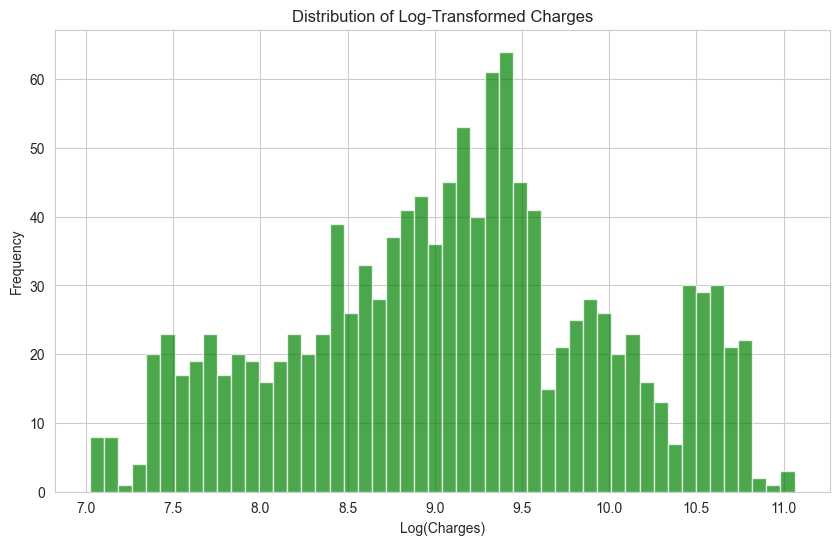

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the distribution of 'charges'
plt.figure(figsize=(10, 6))
plt.hist(data['charges'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Log transformation of 'charges'
data['log_charges'] = np.log(data['charges'])

# Plot the distribution of log-transformed 'charges'
plt.figure(figsize=(10, 6))
plt.hist(data['log_charges'], bins=50, color='green', alpha=0.7)
plt.title('Distribution of Log-Transformed Charges')
plt.xlabel('Log(Charges)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


可以看出，对charges进行对数变换后，数据的分布更加接近正态分布。这有助于改善线性回归模型的性能。

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

# 线性回归模型
model = LinearRegression()

# 训练模型
model.fit(X_train, y_train_log)

# 预测测试集
y_pred = model.predict(X_test)

# 模型评估
mse = mean_squared_error(y_test_log, y_pred)
rmse = mean_squared_error(y_test_log, y_pred, squared=False)
r2 = r2_score(y_test_log, y_pred)

# mse, rmse, r2

print(f"模型的均方误差(MSE): {mse}")
print(f"模型的均方根误差(RMSE): {rmse}")
print(f"模型的确定系数(R^2): {r2}")

模型的均方误差(MSE): 0.22770633628533432
模型的均方根误差(RMSE): 0.4771858508855164
模型的确定系数(R^2): 0.7245471080980606


绘制测试集，预测值和真实值的折线图；由于 charges 取了对数，绘制折线图前，需要指数变换还原其原始值

In [10]:
y_pred_original = np.exp(y_pred)
y_pred_original[:5]

array([48636.20024639,  6909.55354973,  3635.70768862,  3102.47249024,
       17643.2247255 ])

将 charges 中位数作为 baseline，比较线性回归模型的性能

模型的均方误差(MSE): 0.22770633628533432
模型的均方根误差(RMSE): 0.4771858508855164
模型的确定系数(R^2): 0.7245471080980606
baseline 的均方误差(MSE): 0.8278577285645143
baseline 的均方根误差(RMSE): 0.9098668740890143
baseline 的确定系数(R^2): 0.7245471080980606


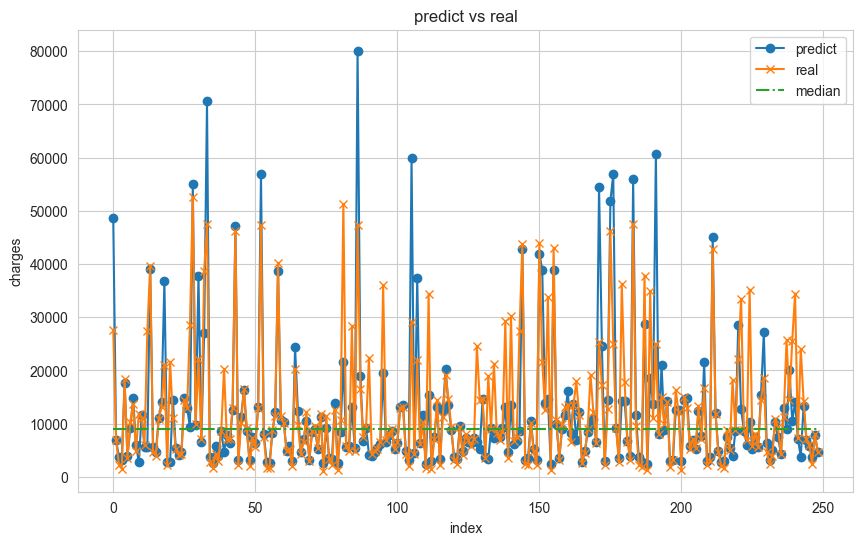

In [11]:
print(f"模型的均方误差(MSE): {mse}")
print(f"模型的均方根误差(RMSE): {rmse}")
print(f"模型的确定系数(R^2): {r2}")

# 基于中位数的基准预测
median_pred = y_test.median()  # 获取中位数值

# 为每个测试样本生成基准预测
median_preds = [median_pred for _ in range(len(y_test))]

median_preds_log = np.log(median_preds)

mse_baseline = mean_squared_error(y_test_log, median_preds_log)
rmse_baseline = mean_squared_error(y_test_log, median_preds_log, squared=False)
r2_baseline = r2_score(y_test_log, median_preds_log)

print(f"baseline 的均方误差(MSE): {mse_baseline}")
print(f"baseline 的均方根误差(RMSE): {rmse_baseline}")
print(f"baseline 的确定系数(R^2): {r2}")


# 绘制对比图
df_comparison = pd.DataFrame(
    {
        'predicted': y_pred_original,
        'real': y_test,
        'median': median_preds,
    }
)

# 重制索引
df_comparison = df_comparison.reset_index(drop=True)

plt.figure(figsize=(10,6))
plt.plot(df_comparison.index, df_comparison['predicted'], label='predict', marker='o')
plt.plot(df_comparison.index, df_comparison['real'], label='real', marker='x')
plt.plot(df_comparison.index, df_comparison['median'], label='median', linestyle='-.')

plt.title('predict vs real')
plt.xlabel('index')
plt.ylabel('charges')
plt.legend()
plt.show()

使用 tensorflow 训练线性回归模型

NameError: name 'X_train' is not defined